In [20]:
# Load needed Python modules
import netCDF4
import matplotlib.pyplot as plt
import os
import astropy
import numpy as np
from astropy.convolution import convolve as ap_convolve
from astropy.convolution import Box2DKernel
from netCDF4 import num2date
from mpl_toolkits.axes_grid1 import make_axes_locatable

205.0
208.0


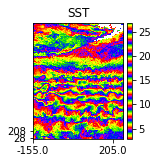

205.0
208.0


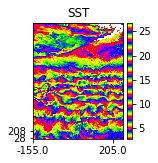

205.0
208.0


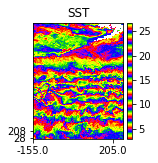

205.0
208.0


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [31]:
# Change to SSD with files
os.chdir('/nfs/cnhlab003/cnh')

for filename in os.listdir('mur-sst'):
    if filename[:6] == '201111':

        # Create "handle" to access netCDF file
        tFile = netCDF4.Dataset('mur-sst/'+filename)

        # Extract data from file
        sst=tFile['analysed_sst']
        date_num = tFile['time'][:]
        units = tFile.variables['time'].units
        date = num2date(date_num, units)[0]
        date = str(date)
        date = date[:10]
        lat = tFile.variables['lat']
        lon = tFile.variables['lon']
        lat_min = lat.valid_min
        lon_min = lon.valid_min
        lat_min = (11800/100) + lat_min
        lon_min = (2500/100) + lon_min
        lat_max = lat.valid_max
        lon_max = lon.valid_max
        lat_max = (11800/100) + lat_max
        lon_max = (2500/100) + lon_max
        print(lon_max)
        print(lat_max)
        

        # Extract a subregion
        sstReg=sst[0,11800:15000,0:2500]-273.
        
        # Make sst plot
        ax = plt.subplot(131)
        fig1 = plt.imshow(sstReg,origin='lower',cmap='prism')
        plt.xticks([0, 2200], [lon_min, lon_max])
        plt.yticks([lat_min, lat_max])
        plt.title("SST")
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(fig1, cax=cax)
        
#         # Convolve
#         box_2D_kernel = Box2DKernel(9)
#         nan=float('nan')
#         sstReg=np.ma.filled(sstReg,nan)
#         sstReg[ :, 0]=nan
#         sstReg[ 0, :]=nan
#         sstReg[ :,-1]=nan
#         sstReg[-1, :]=nan
#         sstReg2=ap_convolve(sstReg, box_2D_kernel)
#         dd=sstReg2
#         dd=dd[9:-9, 9:-9]
#         dd=np.ma.masked_invalid(dd)
#         ddmean=np.mean(dd)
#         ddstd=np.std(dd)
#         dd=dd-ddmean
        
#         ax = plt.subplot(132)
#         fig2 = plt.imshow(sstReg,origin='lower',cmap='prism')
#         plt.title("Convolved SST")
#         divider = make_axes_locatable(ax)
#         cax = divider.append_axes("right", size="5%", pad=0.05)
#         plt.colorbar(fig2, cax=cax)
        
#         # Make difference plot
#         ax = plt.subplot(133)
#         sstReg=sstReg[9:-9, 9:-9]
#         dif = sstReg - dd

#         fig3 = plt.imshow(dif,origin='lower',cmap='prism')
#         plt.title("Difference")
#         divider = make_axes_locatable(ax)
#         cax = divider.append_axes("right", size="5%", pad=0.05)
#         plt.colorbar(fig3, cax=cax)
        
#         plt.subplots_adjust(wspace=1)
        
        plt.show()
        plt.clf()
        
        
        
